In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import danych
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

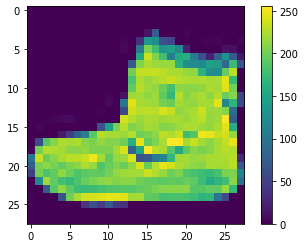

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

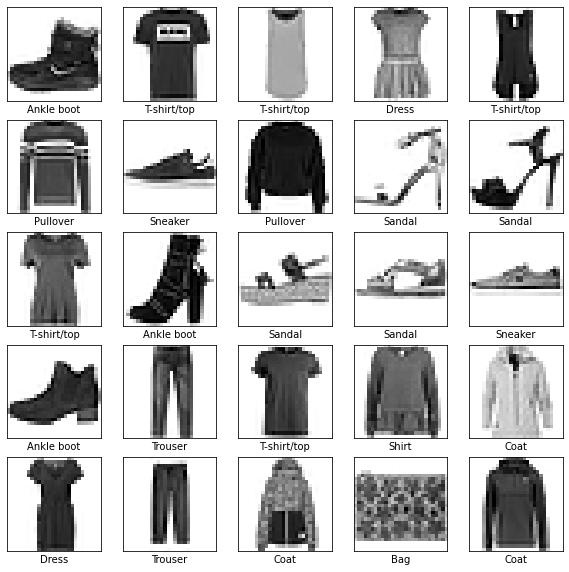

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
#Przygotowanie modelu
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4982 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3691 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3350 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2797 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2676 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2560 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2449 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [12]:
#ocena dokładności modelu
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"strata modelu: {test_loss}")
print(f"dokładność modelu: {test_acc}")

313/313 - 1s - loss: 0.3307 - accuracy: 0.8824 - 595ms/epoch - 2ms/step
strata modelu: 0.33072182536125183
dokładność modelu: 0.8823999762535095


In [13]:
#Prognozowanie
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [15]:
predictions[0]

array([1.0219153e-07, 3.1580320e-12, 3.4776507e-10, 1.1335383e-09,
 2.2290081e-08, 1.4262932e-04, 7.7043785e-09, 1.8520189e-02,
 6.4548090e-08, 9.8133689e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

In [18]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

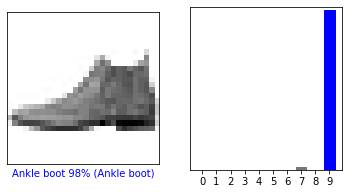

In [19]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

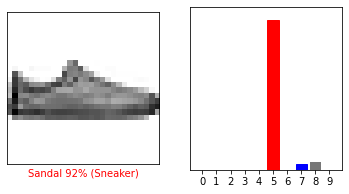

In [20]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

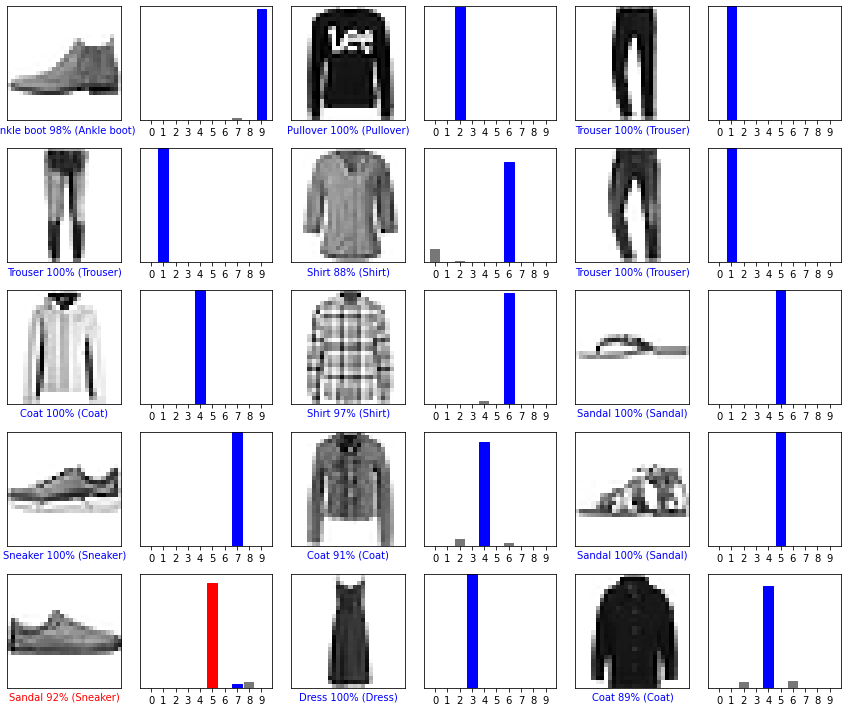

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [23]:
#użycie wyszkolonego modelu
img = test_images[1]
print(img.shape)

(28, 28)


In [24]:
img = (np.expand_dims(img,0))

In [25]:
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[5.0151484e-05 7.3433648e-11 9.9834740e-01 3.5984739e-11 6.0938270e-04
  1.4627315e-12 9.9300558e-04 9.5013547e-18 4.9468896e-10 1.2428813e-14]]


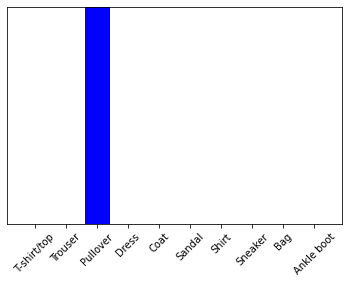

In [27]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

2